# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [1]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow
from tensorflow import keras

2024-12-05 20:23:00.245904: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 20:23:00.262364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733430180.282091     123 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733430180.287971     123 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 20:23:00.307659: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
from tensorflow.keras.preprocessing.image import load_img

- 299*299
- 224*224
- 150*150

In [5]:
img_path = './clothing-dataset-small/train/t-shirt'
img_name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
full_path = f'{img_path}/{img_name}'

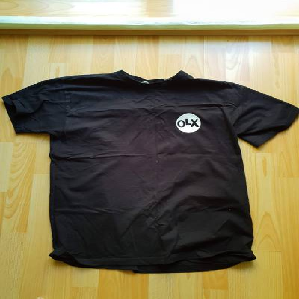

In [6]:
img = load_img(full_path, target_size=(299,299))
img

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights='imagenet',input_shape=(299,299,3))

I0000 00:00:1733430186.499313     123 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


In [10]:
X = np.array([x])

In [11]:
# Preprocessing required
model.predict(X)

I0000 00:00:1733430189.817009     176 service.cc:148] XLA service 0x7f6eec003590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733430189.817042     176 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-05 20:23:09.851952: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733430190.160758     176 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-05 20:23:11.297180: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1733430192.146839     176 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [12]:
#  After applying data preprocessing
X = preprocess_input(X)

In [13]:
# Predictions are then relayed as floats btn 0 and 1
pred = model.predict(X)
pred[0, :10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([0.00032371, 0.00015738, 0.00021349, 0.00015237, 0.00024763,
       0.00030504, 0.00032059, 0.0001475 , 0.00020362, 0.00014927],
      dtype=float32)

Add decoding of predictions to find out which class the prediction belongs to

In [14]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.6819637)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139876)),
  ('n04370456', 'sweatshirt', np.float32(0.03432471)),
  ('n03710637', 'maillot', np.float32(0.011354204)),
  ('n04525038', 'velvet', np.float32(0.0018453564))]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
#Training dataset
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input # Applies preprocess inout function to image
)

In [27]:
train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train",
    target_size=(150,150),
    batch_size=32) # Loads images into 32 batches

Found 3068 images belonging to 10 classes.


In [28]:
#Validation dataset

validation_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input # Applies preprocess inout function to image
)

In [29]:
val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation",
    target_size=(150,150),
    batch_size=32) 

Found 341 images belonging to 10 classes.


In [31]:
# Creating theh model
base_model = Xception(
    weights='imagenet', # Uses images pretrained on iMAGENET
    include_top=False, # Keeps only the convolutional layer
    input_shape=(150,150,3)
)

base_model.trainable = False

Note the include_top parameter: this way, we explicitly specify that we’re not interested
in the dense layers of the pretrained neural network, only in the convolutional
layers. In Keras terminology, the “top” is the set of final layers of the network

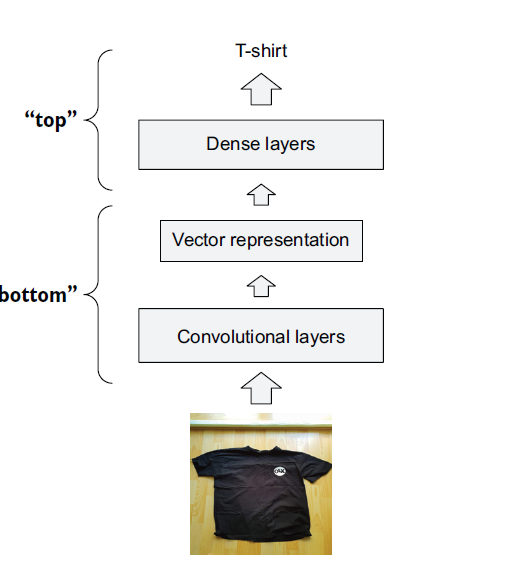

Even though base_model is already a model, we use it as a function and give it two parameters — `inputs`, and `training=False`:
- The first parameter says what will be the input to base_model. It will come from inputs.
- The second parameter (training=False) is optional and says that we don’t want to train the base model.

The result is base, which is a functional component (like base_model) that we can combine with other components. We use it as the input to the next layer

In [32]:
#Specify the size of expected arrays
inputs = keras.Input(shape=(150,150,3))

# Use base model to extract high level features
base = base_model(inputs,training=False)

#Extract vector representation: Converts output of base_model to a vector
'''
create a pooling layer — a special construction that allows us to convert the output of a convolutional layer (a 3-D array) into a vector (a one-dimensional
array).
'''
# vector = keras.layers.GlobalAveragePooling2D()(base)

pooling = keras.layers.GlobalAveragePooling2D()
vector = pooling(base)

#Add a dense layer of size 10 -> 1 element of each class
# outputs = keras.layers.Dense(10)(vector)

# alternatively 
outputs = keras.layers.Dense(10,activation='softmax')(vector)

#combine inputs and outputs
model = keras.Model(inputs,outputs)

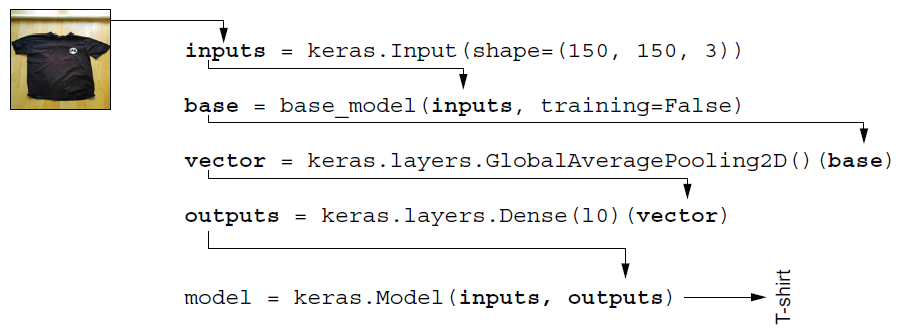

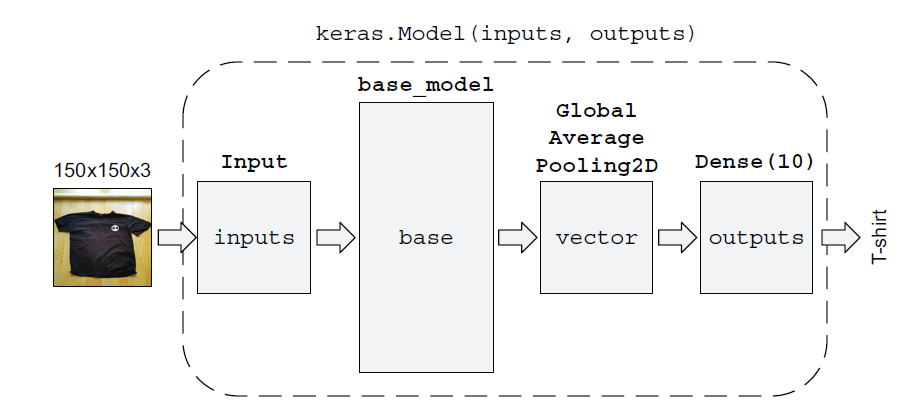

#### Training the model

To train a model, the optimizer needs to know whether the model is doing well. For that, it uses a loss function, which becomes smaller as the network becomes better. The goal of the optimizer is to minimize this loss.
The keras.losses package offers many different losses. Here’s a list of the most important ones:
- **BinaryCrossentropy**: For training a binary classifier
- **CategoricalCrossentropy**: For training a classification model with multiple classes
- **MeanSquaredError**: For training a regression model


In [33]:
#An optimizer needed to adkjust weights

learning_rate =0.01
optimizer = keras.optimizers.Adam(learning_rate)

'''
Because we need to classify clothing into 10 different classes, we use the categorical cross-entropy loss:
'''

# If outputs has activation = softmax, categorical_crossentropy can eliminate from_logits
loss = keras.losses.CategoricalCrossentropy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=["accuracy"]
)

- `train_ds`: The dataset for training
- `epochs`: The number of times it will go over the training data
- `validation_data`: The dataset for evaluation

In [34]:
!nvidia-smi

Thu Dec  5 20:35:10 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.12              Driver Version: 550.90.12      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       On  |   00000000:00:1E.0 Off |                    0 |
| N/A   29C    P0             31W /   70W |   14093MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [35]:
model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.5883 - loss: 1.6232 - val_accuracy: 0.7566 - val_loss: 0.9308
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8182 - loss: 0.5062 - val_accuracy: 0.8006 - val_loss: 0.7340
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8935 - loss: 0.2709 - val_accuracy: 0.8035 - val_loss: 0.6922
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9249 - loss: 0.2043 - val_accuracy: 0.8035 - val_loss: 0.7845
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9527 - loss: 0.1300 - val_accuracy: 0.8123 - val_loss: 0.7964
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9654 - loss: 0.0988 - val_accuracy: 0.8299 - val_loss: 0.7753
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9855 - loss: 0.0564 - val_accuracy: 0.7859 - val_loss: 0.8953
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9914 - loss: 0.0454 - val_accuracy: 0.8182 -

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

## 8.11 Training a larger model

* Train a 299x299 model

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

